# Úkol č. 3 - regrese

 * **Deadline je do 20. prosince 23:59**, pokud odevzdáte úkol do 27. prosince 23:59 budete penalizování -4 body, pozdější odevzdání je bez bodu.
 * V rámci tohoto úkolu se musíte vypořádat s problematikou regrese a hledání optimálních hyperparametrů.
     
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Dataset

  * Zdrojem dat je soubor `LifeExpectancyData.csv` na course pages (originál zde: https://www.kaggle.com/kumarajarshi/life-expectancy-who).
  * Popis datasetu najdete na uvedené stránce s originálem datasetu.
  * Cílová (vysvětlovaná) proměnná se jmenuje `Life expectancy `.
  

## Pokyny k vypracování
**Body zadání**, za jejichž (poctivé) vypracování získáte **16 bodů**:

  1. Odeberte z dat body u kterých neznáte vysvětlovanou proměnnou.
  1. Rozdělte data na trénovací a testovací množinu.
  1. Proveďte základní průzkum dat a svá pozorování diskutujte. Na jeho základě adekvátně reagujte na problematické věci v datech (chybějící hodnoty, atd.) a vysvětlete motivaci k provedeným krokům.
  1. Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:
      * K měření chyby použijte `mean_absolute_error`.

  1. Zkoumejte, jak byste mohli modely vylepšit:
      * Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
      * Experimentujte se standardizací/normalizací dat.
      * Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
      * Získané výsledky vždy řádně okomentujte.
    
  1. Použijte i jiné modely (alespoň jeden) ukazované v předmětu VZD či i jiné, pokud víte, jak fungují.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

## 1. Odeberte z dat body u kterých neznáte vysvětlovanou proměnnou.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('LifeExpectancyData.csv')

In [3]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


* K jednotlivým příznakům se bude nepohodlně přistupovat, neboť mají mezery po (nebo i před) svém názvu.
* Proto tyto bílé znaky smažu.

In [4]:
df.columns = df.columns.str.strip()

* Nyní je to použitelnější.

In [5]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


* Vysvětlovaná proměnná je 'Life expectancy', zbavím se tedy záznamů, u kterých je tato hodnota nedefinována.

In [6]:
df.shape[0] - df[df['Life expectancy'].notnull()].shape[0]

10

* 10 záznamů nemá definovanou 'Life expectancy' - o tyto záznamy dataframe ochudíme.

In [7]:
df = df[df['Life expectancy'].notnull()]

## 2. Rozdělte data na trénovací a testovací množinu.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X, X_test, Y, Y_test = train_test_split(
    df.drop(columns=['Life expectancy']), 
    df["Life expectancy"],
    test_size=0.25, 
    random_state=42
)
print("Train X shape", X.shape)
print("Test X shape", X_test.shape)

Train X shape (2196, 21)
Test X shape (732, 21)


## 3. Proveďte základní průzkum dat a svá pozorování diskutujte. Na jeho základě adekvátně reagujte na problematické věci v datech (chybějící hodnoty, atd.) a vysvětlete motivaci k provedeným krokům.

In [10]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


* Příznak 'Alcohol' je null-ový v některých záznamech. 

In [11]:
df[df['Alcohol'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [12]:
grouped_alc = df.groupby(['Country'])['Alcohol'].mean()
grouped_alc[grouped_alc.isnull()]

Country
South Sudan   NaN
Name: Alcohol, dtype: float64

In [13]:
SS = df[df['Country'] == 'South Sudan']['Year']
print(SS.min())
print(SS.max())

2000
2015


* Pouze o 'South Sudan' nemáme žádný záznam o tom, kolik alkoholu se tam konzumuje.
* Vzhledem k tomu, že data o této zemi máme od roku 2000 až po rok 2015, a alkohol v ní byl od roku 1983 do roku 2020 zakázan, položíme pro záznamy s touto zemí 'Alcohol' rovný nule.

In [14]:
alc_dict = grouped_alc.to_dict()
alc_dict['South Sudan'] = 0.0

print(alc_dict['South Sudan'])

0.0


In [15]:
# alc_dict

In [16]:
df.loc[df['Alcohol'].isnull(), 'Alcohol'] = df.loc[df['Alcohol'].isnull()]['Country'].apply(lambda x: alc_dict[x])

* Tedy záznamy, u kterých chyběla informace o konzumaci alkoholu, jsem nahradil zaznamenaným průměrem alkoholické konzumace v této zemi.

In [17]:
# funkce vrátí slovník, který 
# vznikne sloučením záznamů dle zemí 
# a nalezení průměru příznaku col_name 
# klíc    -> název země
# hodnota -> průměr col_name pro tuto zem

def make_dict_by_country(col_name, df):
    grouped = df.groupby(['Country'])[col_name].mean()
    grouped[grouped.isnull()]
    return grouped.to_dict()

In [18]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [19]:
hep_dict = make_dict_by_country('Hepatitis B', df)

In [20]:
import math as mh
for item in hep_dict.items():
    if (mh.isnan(item[1])):
        print(item)

('Denmark', nan)
('Finland', nan)
('Hungary', nan)
('Iceland', nan)
('Japan', nan)
('Norway', nan)
('Slovenia', nan)
('Switzerland', nan)
('United Kingdom of Great Britain and Northern Ireland', nan)


* Nahradím hodnoty 'Hepatitis B' v těchto zemích průměrem této proměnné v zemích, které jsou těmto zemím podobné (subjektivně - např. dle toho, jak si jsou teritoriálně, etnicky a kulturně blízko) a mají definované hodnoty pro Hep. B

In [21]:
# hep_dict

In [22]:
hep_dict['Denmark']  = hep_dict['Sweden']
hep_dict['Finland']  = hep_dict['Sweden']
hep_dict['Hungary']  = hep_dict['Slovakia']
hep_dict['Iceland']  = hep_dict['Sweden']
hep_dict['Japan']    = hep_dict["Democratic People's Republic of Korea"]
hep_dict['Norway']   = hep_dict['Sweden']
hep_dict['Slovenia'] = hep_dict['Serbia']
hep_dict['Switzerland'] = (hep_dict['France'] + hep_dict['Austria'] + hep_dict['Germany'])/3.0
hep_dict['United Kingdom of Great Britain and Northern Ireland'] = hep_dict['Ireland']

In [23]:
df.loc[df['Hepatitis B'].isnull(), 'Hepatitis B'] = df[df['Hepatitis B'].isnull()]['Country'].apply(lambda x: hep_dict[x])

* Nyní se kouknu na BMI.

In [24]:
df[df['Status'] == 'Developed']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
112,Australia,2015,Developed,82.8,59.0,1,10.155333,0.00000,93.0,74,...,93.0,NaN,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.710000,10769.36305,91.0,340,...,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.870000,11734.85381,91.0,158,...,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,1,10.030000,11714.99858,91.0,199,...,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,1,10.300000,10986.26527,92.0,190,...,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.480000,0.00000,92.0,37,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.400000,0.00000,92.0,56,...,91.0,15.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.330000,0.00000,88.0,41,...,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.250000,0.00000,89.0,116,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


* V datech je zřejmě chyba, neboť zde pozoruji vyspělé země, které mají zaznamenané 'BMI' menší, než 10, což není vůbec důvěryhodné. 
* Tento sloupec proto vynásobím číslem 10, je-li aktuální hodnota 'BMI' < 10.

In [25]:
df.loc[df['BMI'] < 10, 'BMI'] = df.loc[df['BMI'] < 10, 'BMI'].apply(lambda x: x * 10)

In [26]:
df['BMI'].isna().sum()

32

* Nyní se zbavím 32 nedefinovaných hodnot v 'BMI'.

In [27]:
df[df['BMI'].isna()]['Country'].unique()

array(['South Sudan', 'Sudan'], dtype=object)

* Udělám to podobně, jako s 'Hepatitis B'.

In [28]:
# sudan_means - list, který v sobě má průměrné BMI 
#               zemí, které jsou Sudánu podobné
sudan_means = []
sudan_means.append(df[df['Country'] == 'Chad']['BMI'].mean())
sudan_means.append(df[df['Country'] == 'Somalia']['BMI'].mean())
sudan_means.append(df[df['Country'] == 'Ethiopia']['BMI'].mean())
sudan_means.append(df[df['Country'] == 'Eritrea']['BMI'].mean())
sudan_means.append(df[df['Country'] == 'Mauritania']['BMI'].mean())

In [29]:
# zprůměruji průměrné BMI zemí, které jsou Sudánu podobné
sudan_bmi = sum(sudan_means)/len(sudan_means)

In [30]:
# Sudan
df.loc[df['Country'] == 'Sudan', 'BMI']       = df.loc[df['Country'] == 'Sudan',       'BMI'].apply(lambda x: sudan_bmi)

# South Sudan
df.loc[df['Country'] == 'South Sudan', 'BMI'] = df.loc[df['Country'] == 'South Sudan', 'BMI'].apply(lambda x: sudan_bmi)

* Příznak 'Polio' je na řadě.

In [31]:
df[df['Country'] == 'Afghanistan'][['Year', 'Polio']]

,Year,Polio
0,2015,6.0
1,2014,58.0
2,2013,62.0
3,2012,67.0
4,2011,68.0
5,2010,66.0
6,2009,63.0
7,2008,64.0
8,2007,63.0
9,2006,58.0


* Je nelogické, aby Afghanistan měl skoro deset let v kuse stabilních ~60% proočkovanosati jednoletých dětí a pak z ničeho nic v roce 2015 ta proočkovanost kleska na 6%.
* Problém budu řešit podobně, jako s 'BMI' - t.j. vynásobím číslem 10, je-li 'Polio' menší než 10 a zároveň výrazně menší, než průměr v té zemi.

In [32]:
tmp = df[df['Polio'] < 10][['Country', 'Polio']].to_numpy()

for i in tmp:
    if i[1] <= df[df['Country'] == i[0]]['Polio'].mean():
        i[1] = i[1] * 10

In [33]:
# tmp

In [34]:
df.loc[df['Polio'] < 10, 'Polio'] = pd.DataFrame(tmp, columns=['Country', 'Polio'])['Polio']

In [35]:
df['Polio'] = df['Polio'].astype('float')

* Nyní se ještě musím vypořádat s nan.

In [36]:
df[df['Polio'].isna()]['Country'].unique()

array(['Bangladesh', 'Barbados', 'Belarus', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Burkina Faso', "Côte d'Ivoire", 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Iceland', 'Indonesia', 'Iraq', 'Ireland', 'Jamaica', 'Kenya',
       'Kiribati', "Lao People's Democratic Republic", 'Lebanon',
       'Lesotho', 'Liberia', 'Lithuania', 'Madagascar', 'Mali',
       'Mauritania', 'Montenegro', 'Mozambique', 'Myanmar', 'Namibia',
       'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
       'Republic of Kor

In [37]:
df['Polio'].corr(df['Life expectancy'])

0.6159090156051622

In [38]:
df.loc[df['Polio'].isna(), 'Polio'] = df['Polio'].mean()

In [39]:
df['Polio'].corr(df['Life expectancy'])

0.5916777485584881

* Nahrazení všech nan hodnot společným průměrem korelaci mezi 'Polio' a 'Life expectancy' nijak extra neovlivnilo (o ~0.024). Nechám to tedy takhle naivně.

* Detekuji příznaky, které slabě korelují s vysvětlovanou proměnnou 'Life expectancy' a zbavím se jich (vyjma 'Population').

In [40]:
cols_to_drop = []

for i in df.columns:
    if df[i].dtype == 'O':
        continue
    if abs(df['Life expectancy'].corr(df[i])) <= 0.249:
        cols_to_drop.append(i)


# příznaku 'Population' se zatím zbavovat nebudu, 
# zkusím si ještě pohrát s tím bordelem, který se v tom sloupci děje

cols_to_drop.remove('Population')
print(cols_to_drop)

['Year', 'infant deaths', 'Measles', 'under-five deaths', 'Total expenditure']


<AxesSubplot:>

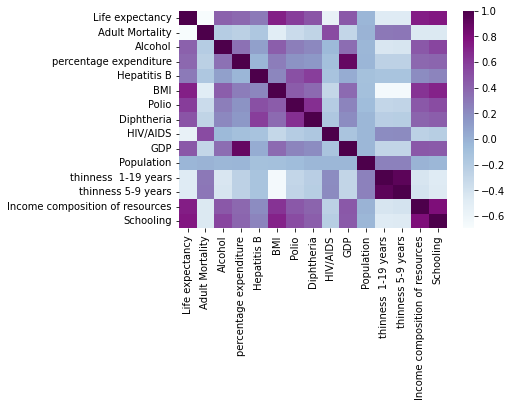

In [41]:
import seaborn as sb

df.drop(columns=cols_to_drop, inplace=True)
sb.heatmap(df.corr(), cmap="BuPu")

* Zakoduji 'Status'.

In [42]:
# Developed  --> 0
# Developing --> 1

df['Status'] = df.Status.astype('category').cat.codes

* Vyřeším 'GDP'.

* Prvně se pokusím napravit chybu v datech (např. u Německa je GDP jednou ~4000, jindy zase správně ~40000).

In [43]:
gdp_dict = df[['Country', 'GDP']].groupby('Country').mean().to_dict()['GDP']

In [44]:
# gdp_dict

In [45]:
# funkce zjistí, jakého řádu je číslo tmp
def num_of_numbers(tmp):
    cnt = 0

    while tmp >= 1:
        tmp = tmp/10
        cnt += 1

    #print(cnt)
    return cnt

In [46]:
for country in gdp_dict:
    #print(num_of_numbers(gdp_dict[country]))
    gdp_dict[country] = num_of_numbers(gdp_dict[country])

In [47]:
tmp = df[['Country', 'GDP']].to_numpy()

tmp

array([['Afghanistan', 584.25921],
       ['Afghanistan', 612.696514],
       ['Afghanistan', 631.744976],
       ...,
       ['Zimbabwe', 57.34834],
       ['Zimbabwe', 548.587312],
       ['Zimbabwe', 547.3588785]], dtype=object)

In [48]:
for i in tmp:
    if gdp_dict[i[0]] > num_of_numbers(i[1]):
        # print(gdp_dict[i[0]] - num_of_numbers(i[1]))
        for j in range(gdp_dict[i[0]] - num_of_numbers(i[1])):
            i[1] = i[1] * 10

In [49]:
df['GDP'] = pd.DataFrame(tmp, columns=['Country', 'GDP'])['GDP']
df

,Country,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1,65.0,263.0,0.01,71.279624,65.0,19.1,60.00000,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,1,59.9,271.0,0.01,73.523582,62.0,18.6,58.00000,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,1,59.9,268.0,0.01,73.219243,64.0,18.1,62.00000,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,1,59.5,272.0,0.01,78.184215,67.0,17.6,67.00000,67.0,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,1,59.2,275.0,0.01,7.097109,68.0,17.2,68.00000,68.0,0.1,635.37231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,1,44.3,723.0,4.36,0.000000,68.0,27.1,67.00000,65.0,33.6,NaN,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,1,44.5,715.0,4.06,0.000000,7.0,26.7,87.19214,68.0,36.7,NaN,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,1,44.8,73.0,4.43,0.000000,73.0,26.3,73.00000,71.0,39.8,NaN,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,1,45.3,686.0,1.72,0.000000,76.0,25.9,76.00000,75.0,42.1,NaN,12366165.0,1.6,1.7,0.427,9.8


In [50]:
df['GDP'] = df['GDP'].astype('float')

* Nyní vyřeším nan.

In [51]:
df['Life expectancy'].corr(df['GDP'])

0.39765321128758696

In [52]:
tmp = df.copy(deep=True)
tmp[tmp['GDP'].isna()] = tmp['GDP'].mean()

In [53]:
tmp['Life expectancy'].corr(tmp['GDP'])

0.0008922447961236101

* Je zřejmé, že naivně nahradit GDP v tomhle případě nepůjde, aniž by to nemělo špatný vliv na korelaci. 
* V tuhle chvíli tedy dropnu 'GDP'. Možná se k tomu později vrátím.

In [54]:
df.drop(columns=['GDP'], inplace=True)

* U 'Population' mě očekávají podobné problémy, jako u 'GDP', proto to preventivně dropnu, abych si nepřidělával zbytečnou práci v tento okamžik. 

In [55]:
df.drop(columns=['Population'], inplace=True)

* Mrknu se na thinness.

In [56]:
df[df['thinness  1-19 years'].isna()]['Country'].unique()

array(['South Sudan', 'Sudan'], dtype=object)

In [57]:
# sudan_means - list, který v sobě má průměrné 'thinness  1-19 years'
#               zemí, které jsou Sudánu podobné
sudan_means = []
sudan_means.append(df[df['Country'] == 'Chad']['thinness  1-19 years'].mean())
sudan_means.append(df[df['Country'] == 'Somalia']['thinness  1-19 years'].mean())
sudan_means.append(df[df['Country'] == 'Ethiopia']['thinness  1-19 years'].mean())
sudan_means.append(df[df['Country'] == 'Eritrea']['thinness  1-19 years'].mean())
sudan_means.append(df[df['Country'] == 'Mauritania']['thinness  1-19 years'].mean())

In [58]:
sudan_th_1_19 = sum(sudan_means)/len(sudan_means)

In [59]:
df.loc[df['thinness  1-19 years'].isna(), 'thinness  1-19 years'] = sudan_th_1_19

In [60]:
df[df['thinness 5-9 years'].isna()]['Country'].unique()

array(['South Sudan', 'Sudan'], dtype=object)

In [61]:
# sudan_means - list, který v sobě má průměrné 'thinness  5-9 years'
#               zemí, které jsou Sudánu podobné
sudan_means = []
sudan_means.append(df[df['Country'] == 'Chad']['thinness 5-9 years'].mean())
sudan_means.append(df[df['Country'] == 'Somalia']['thinness 5-9 years'].mean())
sudan_means.append(df[df['Country'] == 'Ethiopia']['thinness 5-9 years'].mean())
sudan_means.append(df[df['Country'] == 'Eritrea']['thinness 5-9 years'].mean())
sudan_means.append(df[df['Country'] == 'Mauritania']['thinness 5-9 years'].mean())

In [62]:
sudan_th_5_19 = sum(sudan_means)/len(sudan_means)

In [63]:
df.loc[df['thinness 5-9 years'].isna(), 'thinness 5-9 years'] = sudan_th_5_19

* Nyní vyřeším problémy s 'Income composition of resources'.

In [64]:
df[df['Income composition of resources'].isna()].shape[0]

160

In [65]:
df[df['Income composition of resources'].isna()]['Country'].unique()

array(["Côte d'Ivoire", 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Republic of Korea',
       'Republic of Moldova', 'Somalia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America'],
      dtype=object)

In [66]:
df['Life expectancy'].corr(df['Income composition of resources'])

0.7247759785960611

In [67]:
icr = "Income composition of resources"

df.loc[(df["Country"] == "Côte d'Ivoire") & (df[icr].isna()), icr] = df[
    df["Country"] == "Guinea"
][icr].mean()

df.loc[(df["Country"] == "Czechia") & (df[icr].isna()), icr] = df[
    df["Country"] == "Slovakia"
][icr].mean()

df.loc[
    (df["Country"] == "Democratic People's Republic of Korea") & (df[icr].isna()), icr
] = df[df["Country"] == "Japan"][icr].mean()

df.loc[
    (df["Country"] == "Democratic Republic of the Congo") & (df[icr].isna()), icr
] = df[df["Country"] == "Angola"][icr].mean()

df.loc[(df["Country"] == "Republic of Korea") & (df[icr].isna()), icr] = df[
    df["Country"] == "Japan"
][icr].mean()

df.loc[(df["Country"] == "Republic of Moldova") & (df[icr].isna()), icr] = df[
    df["Country"] == "Ukraine"
][icr].mean()

df.loc[(df["Country"] == "Somalia") & (df[icr].isna()), icr] = df[
    df["Country"] == "Ethiopia"
][icr].mean()

df.loc[
    (df["Country"] == "United Kingdom of Great Britain and Northern Ireland")
    & (df[icr].isna()),
    icr,
] = df[df["Country"] == "Ireland"][icr].mean()

df.loc[(df["Country"] == "United Republic of Tanzania") & (df[icr].isna()), icr] = df[
    df["Country"] == "Angola"
][icr].mean()

df.loc[(df["Country"] == "United States of America") & (df[icr].isna()), icr] = df[
    df["Country"] == "Canada"
][icr].mean()


In [68]:
df['Life expectancy'].corr(df['Income composition of resources'])

0.7346492739021891

* Nahrazení proběhlo na základě mého subjektivního pozorování toho, že určité země si jsou podobné. Byť je velmi naivní, proběhlo poměrně úspěšně. Korelace vůči vysvětlované proměnné se vychýlila o +0.01 vůči korelaci původní. 

In [69]:
df['Life expectancy'].corr(df['Schooling'])

0.7519754627366978

In [70]:
df[df['Schooling'].isna()]['Country'].unique()

array(["Côte d'Ivoire", 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Republic of Korea',
       'Republic of Moldova', 'Somalia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America'],
      dtype=object)

In [71]:
icr = "Schooling"

df.loc[(df["Country"] == "Côte d'Ivoire") & (df[icr].isna()), icr] = df[
    df["Country"] == "Guinea"
][icr].mean()

df.loc[(df["Country"] == "Czechia") & (df[icr].isna()), icr] = df[
    df["Country"] == "Slovakia"
][icr].mean()

df.loc[
    (df["Country"] == "Democratic People's Republic of Korea") & (df[icr].isna()), icr
] = df[df["Country"] == "Japan"][icr].mean()

df.loc[
    (df["Country"] == "Democratic Republic of the Congo") & (df[icr].isna()), icr
] = df[df["Country"] == "Angola"][icr].mean()

df.loc[(df["Country"] == "Republic of Korea") & (df[icr].isna()), icr] = df[
    df["Country"] == "Japan"
][icr].mean()

df.loc[(df["Country"] == "Republic of Moldova") & (df[icr].isna()), icr] = df[
    df["Country"] == "Ukraine"
][icr].mean()

df.loc[(df["Country"] == "Somalia") & (df[icr].isna()), icr] = df[
    df["Country"] == "Ethiopia"
][icr].mean()

df.loc[
    (df["Country"] == "United Kingdom of Great Britain and Northern Ireland")
    & (df[icr].isna()),
    icr,
] = df[df["Country"] == "Ireland"][icr].mean()

df.loc[(df["Country"] == "United Republic of Tanzania") & (df[icr].isna()), icr] = df[
    df["Country"] == "Angola"
][icr].mean()

df.loc[(df["Country"] == "United States of America") & (df[icr].isna()), icr] = df[
    df["Country"] == "Canada"
][icr].mean()


In [72]:
df['Life expectancy'].corr(df['Schooling'])

0.7641850933833737

* Nyní se korelace mezi 'Life expectancy' a 'Schooling' zvětšila o pouhých ~0.12.

* Kouknu se na sloupec 'Diphtheria'.

* Nejdříve opravím případné chyby v datech, kde je chybně hodnota menší, než 10.

In [73]:
df.loc[df['Diphtheria'] < 10, 'Diphtheria'] = df[df['Diphtheria'] < 10]['Diphtheria'].apply(lambda x: x * 10)

In [74]:
df['Life expectancy'].corr(df['Diphtheria'])

0.6197184926804035

In [75]:
df[df['Diphtheria'].isna()]['Country'].unique()

array(['Montenegro', 'South Sudan', 'Timor-Leste'], dtype=object)

In [76]:
df.loc[df['Country'] == 'Montenegro', 'Diphtheria']  = (df[df['Country'] == 'Serbia']['Diphtheria'].mean() + df[
    df['Country'] == 'Bosnia and Herzegovina']['Diphtheria'].mean() + df[
        df['Country'] == 'Albania']['Diphtheria'].mean() + df[
            df['Country'] == 'Croatia']['Diphtheria'].mean())/4

df.loc[df['Country'] == 'South Sudan', 'Diphtheria']  = df[df['Country'] == 'Sudan']['Diphtheria'].mean()

df.loc[df['Country'] == 'Timor-Leste', 'Diphtheria']  = df[df['Country'] == 'Indonesia']['Diphtheria'].mean()


In [77]:
df['Life expectancy'].corr(df['Diphtheria'])

0.617660611850324

* Korelace vůči vysvětlované proměnné se nehnula. Hnula se o pouhých ~0.002.

* Nyní už jen doladit určité hodnoty u 'Hepatitis B'.

In [78]:
df['Life expectancy'].corr(df['Hepatitis B'])

0.2843576620815246

In [79]:
df.loc[df['Hepatitis B'] < 10, 'Hepatitis B'] = df[df['Hepatitis B'] < 10].apply(lambda x: x * 10)

In [80]:
df['Life expectancy'].corr(df['Hepatitis B'])

0.3278955743520095

* Konečně můžu jít na regresi s případným odladěním dat v budoucnu.

## 4. Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:

* K měření chyby použijte mean_absolute_error.

* Zavedu si funkci na měření chyby pomocí mean_absolute_error.

In [81]:
def get_mae(y_test, y_pred):
    from sklearn.metrics import mean_absolute_error

    return mean_absolute_error(y_test, y_pred)

In [82]:
X, X_test, Y, Y_test = train_test_split(
    df.drop(columns=["Country", "Life expectancy"]), 
    df["Life expectancy"], 
    test_size=0.25,
    random_state=42
)
print("Train X shape", X.shape)
print("Test X shape", X_test.shape)

Train X shape (2196, 13)
Test X shape (732, 13)


In [83]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X,Y)

LinearRegression()

In [84]:
# kod na vykreslení interaktivního grafu
# si s dovolením půjčim z courses a lehce poupravím

def plot_prediction_results(title, true, predicted):
    from plotly import graph_objects as go

    fig = go.Figure(data=go.Scatter(x=[0, 100], y=[0, 100], mode="lines", name="y = ŷ"))
    fig.add_scatter(x=true, y=predicted, name="(test, prediction)", mode="markers")
    fig.update_layout(
        title=f"Visualization of predictions | {title} | MAE: {get_mae(true, predicted)}",
        xaxis_title="Real values",
        yaxis_title="Predicted values",
        
    )

    fig.update_layout(yaxis=dict(range=[0,100],  scaleratio=1));
    fig.update_layout(xaxis=dict(range=[0,100],  scaleratio=1));

    fig.show()

In [85]:
plot_prediction_results("sklearn linear regression", Y_test, clf.predict(X_test))

*  Zkusím nyní aplikovat Hřebenovou regresi.

In [86]:
from sklearn.linear_model import Ridge

clf_r = Ridge(alpha=1.0)
clf_r.fit(X, Y)

Ridge()

In [87]:
get_mae(Y_test, clf_r.predict(X_test))

2.734848114888108

In [88]:
plot_prediction_results("sklearn ridge regression", Y_test, clf_r.predict(X_test))

* Porovnáme výsledky:

In [89]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test, clf.predict(X_test)))
mean_absolute_error(Y_test, clf_r.predict(X_test))

2.7330977140823345


2.734848114888108

In [90]:
lr_score  = get_mae(Y_test, clf.predict(X_test))
rr_score  = get_mae(Y_test, clf_r.predict(X_test))

if lr_score < rr_score:
    print( "Lineární regrese je úspěšnější se score: {}".format(lr_score))
else:
    print("Hřebenová regrese je úspěšnější se score: {}".format(rr_score))

Lineární regrese je úspěšnější se score: 2.7330977140823345


## 5. Zkoumejte, jak byste mohli modely vylepšit:

* Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
* Experimentujte se standardizací/normalizací dat.
* Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
* Získané výsledky vždy řádně okomentujte.

* Nahraju si znovu data, abych případně mohl použít nějaké původní hodnoty.

In [91]:
df2 = pd.read_csv('LifeExpectancyData.csv')

In [92]:
df2.columns = df2.columns.str.strip()

In [93]:
df2 = df2[df2['Life expectancy'].notnull()]

* Pokusím se nyní využít příznak 'Country' aplikací One Hot Encoding. 

In [94]:
df

,Country,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1,65.0,263.0,0.01,71.279624,65.0,19.1,60.00000,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,1,59.9,271.0,0.01,73.523582,62.0,18.6,58.00000,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,1,59.9,268.0,0.01,73.219243,64.0,18.1,62.00000,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,1,59.5,272.0,0.01,78.184215,67.0,17.6,67.00000,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,1,59.2,275.0,0.01,7.097109,68.0,17.2,68.00000,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,1,44.3,723.0,4.36,0.000000,68.0,27.1,67.00000,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,1,44.5,715.0,4.06,0.000000,70.0,26.7,87.19214,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,1,44.8,73.0,4.43,0.000000,73.0,26.3,73.00000,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,1,45.3,686.0,1.72,0.000000,76.0,25.9,76.00000,75.0,42.1,1.6,1.7,0.427,9.8


In [95]:
dummies = pd.get_dummies(df.Country, prefix='Country')

* Příznak 'Year' jsem se rozhodnul vrátit, neboť by mohla být určitá korelace mezi tím, jak roky plynou a jak se země vyvijí, resp. zvyšují se ji (pravděpodobně) takové příznaky, jako 'GDP' atd.

In [96]:
df['Year'] = df2['Year']

* Zkusím data normalizovat.

In [97]:
result = df.drop(columns=['Country', 'Life expectancy']).apply(lambda x: (x-x.min())/(x.max() - x.min()))

In [98]:
result['Life expectancy'] = df['Life expectancy']

* Výsledný dataframe "slepíme" dohromady z levého DF 'df' a pravého DF 'dummies'.

In [99]:
result = pd.concat([dummies, result], axis=1)

In [100]:
result

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,BMI,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Year,Life expectancy
0,1,0,0,0,0,0,0,0,0,0,...,0.105814,0.524390,0.590361,0.000000,0.619565,0.603509,0.505274,0.487923,1.000000,65.0
1,1,0,0,0,0,0,0,0,0,0,...,0.100000,0.500000,0.554217,0.000000,0.630435,0.610526,0.502110,0.483092,0.933333,59.9
2,1,0,0,0,0,0,0,0,0,0,...,0.094186,0.548780,0.578313,0.000000,0.637681,0.617544,0.495781,0.478261,0.866667,59.9
3,1,0,0,0,0,0,0,0,0,0,...,0.088372,0.609756,0.614458,0.000000,0.644928,0.628070,0.488397,0.473430,0.800000,59.5
4,1,0,0,0,0,0,0,0,0,0,...,0.083721,0.621951,0.626506,0.000000,0.655797,0.635088,0.478903,0.458937,0.733333,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,0,0,0,0,0,0,0,0,0,...,0.198837,0.609756,0.590361,0.663366,0.336957,0.326316,0.429325,0.444444,0.266667,44.3
2934,0,0,0,0,0,0,0,0,0,0,...,0.194186,0.856002,0.626506,0.724752,0.351449,0.343860,0.440928,0.458937,0.200000,44.5
2935,0,0,0,0,0,0,0,0,0,0,...,0.189535,0.682927,0.662651,0.786139,0.039855,0.042105,0.450422,0.483092,0.133333,44.8
2936,0,0,0,0,0,0,0,0,0,0,...,0.184884,0.719512,0.710843,0.831683,0.054348,0.056140,0.450422,0.473430,0.066667,45.3


* Zkusím nyní predikce s normalizovanými daty.

* * Nejdříve pro lineární regresi.

In [101]:
from sklearn.model_selection import train_test_split

X, X_test, Y, Y_test = train_test_split(
    result.drop(columns=["Life expectancy"]), 
    result["Life expectancy"], 
    test_size=0.25, 
    random_state=42
)
print("Train X shape", X.shape)
print("Test X shape", X_test.shape)

Train X shape (2196, 197)
Test X shape (732, 197)


In [102]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X,Y)

LinearRegression()

In [103]:
plot_prediction_results("sklearn linear regression", Y_test, lr_model.predict(X_test))

* * Použiju nyní kod ze cvičení k ladění hyperparametru alpha pro Ridge model.

In [104]:
from typing import Callable
from sklearn.model_selection import cross_val_score
import numpy as np

def ridge_model(X, y) -> Callable[[float], float]:
    def inner(alpha: float) -> float:
        model = Ridge(alpha=alpha)
        return -np.mean(cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error'))
    
    return inner

In [105]:
from scipy import optimize
from typing import Tuple

def get_ridge_model(X, y) -> Tuple[Ridge, float]:
    opt_function = ridge_model(X, y)
    
    opt_alpha = optimize.minimize_scalar(
        opt_function, options={'maxiter': 50}, method='bounded', bounds=(0.1, 400)
    )
    
    best_model = Ridge(alpha=opt_alpha.x)
    best_model.fit(X, y)

    return best_model, opt_alpha.x

In [106]:
rr_model, best_alpha = get_ridge_model(X, Y)

In [107]:
print("Nejlepší hodnota parametru alpha je: {}".format(best_alpha))

Nejlepší hodnota parametru alpha je: 0.10000406819977517


* * Predikuji pro hřebenovou regresi.

In [108]:
plot_prediction_results("scikit ridge regression", Y_test, rr_model.predict(X_test))

In [109]:
lr_score  = get_mae(Y_test, lr_model.predict(X_test))
rr_score  = get_mae(Y_test, rr_model.predict(X_test))

if lr_score < rr_score:
    print( "Lineární regrese je úspěšnější se score: {}".format(lr_score))
    plot_prediction_results("scikit linear regression", Y_test, lr_model.predict(X_test))
else:
    print("Hřebenová regrese je úspěšnější se score: {}".format(rr_score))
    plot_prediction_results("scikit ridge regression", Y_test, rr_model.predict(X_test))

Lineární regrese je úspěšnější se score: 1.1751750341530054


## 6. Použijte i jiné modely (alespoň jeden) ukazované v předmětu VZD či i jiné, pokud víte, jak fungují.

* Jakožto první alternativní model použiju DecisionTreeRegressor s laděnou hloubkou pomocí metriky MAE.

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

rd_seed = 228

best_depth=5
best_mae=999

for depth in range(1, 15, 1):
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X, Y)
    
    if get_mae(Y_test, dt.predict(X_test)) < best_mae:
        best_depth = depth
        best_mae = get_mae(Y_test, dt.predict(X_test))

In [111]:
dt = DecisionTreeRegressor(max_depth=best_depth)
dt.fit(X, Y)

plot_prediction_results("DecisionTreeRegressor", Y_test, dt.predict(X_test))

* Jakožto druhý alternativní model použiju RandomForestRegressor s laděnými hyperparametry pomocí metriky MAE.

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid

param_grid = {
    'n_estimators': range(1,100,5),
    'max_depth': range(1,5)
}

param_comb = ParameterGrid(param_grid)

train_acc = []
test_acc = []

for params in param_comb:
    rf = RandomForestRegressor(**params).fit(X, Y)
    train_acc.append(get_mae(Y, rf.predict(X)))
    test_acc.append(get_mae(Y_test, rf.predict(X_test)))

In [113]:
best_params = param_comb[np.argmin(test_acc)]

rf = RandomForestRegressor(**best_params).fit(X, Y)

In [114]:
plot_prediction_results("RandomForestRegressor", Y_test, rf.predict(X_test))

* Podívám se nyní na to, který z alternativních modelů byl pro tento dataset úspěšnější.

In [115]:
dt_score = get_mae(Y_test, dt.predict(X_test))
rf_score = get_mae(Y_test, rf.predict(X_test))

print("Neúspěšnějším alternativním modelem je:")

if dt_score < rf_score:
    print("DecisionTreeRegressor se score: {}".format(dt_score))
    plot_prediction_results("DecisionTreeRegressor", Y_test, dt.predict(X_test))
else:
    print("RandomForestRegressor se score: {}".format(rf_score))
    plot_prediction_results("RandomForestRegressor", Y_test, rf.predict(X_test))

Neúspěšnějším alternativním modelem je:
DecisionTreeRegressor se score: 1.4719070802119687


# K O N E C

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=00eb39a2-b20f-47d3-be80-8aa12fe287b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>